In [1]:
import numpy as np
import torch
DIR = 'data'

words = open(f'{DIR}/names.txt').read().splitlines()
words[:5]

['ieretha', 'bruni', 'bran', 'rachoisa', 'marry']

In [2]:
symbols = set(''.join(words))
print(symbols)

{'c', 'h', 's', 'v', 'e', 'u', 'w', 'a', 'b', 'k', 'g', 'j', 'y', 't', 'l', 'p', 'm', 'f', 'n', 'i', 'd', 'r', 'o'}


In [3]:
from collections import defaultdict

bigrams = defaultdict(int)
for word in words:
    marked_word = "." + word + '.'
    for ch1, ch2 in zip(marked_word, marked_word[1:]):
        bigrams[(ch1, ch2)] += 1        

In [4]:
num_of_symbols = 1 + len(symbols)

stoi = {ch: i + 1 for i, ch in enumerate(sorted(symbols))}
stoi['.'] = 0

itos = {i: ch for ch, i in stoi.items()}
print(stoi)

{'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'r': 17, 's': 18, 't': 19, 'u': 20, 'v': 21, 'w': 22, 'y': 23, '.': 0}


In [5]:
N = torch.zeros((num_of_symbols, num_of_symbols), dtype=torch.int32)
for key, val in bigrams.items():
    c1_idx, c2_idx = stoi[key[0]], stoi[key[1]]
    N[c1_idx, c2_idx] = val

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 23.5, 23.5, -0.5)

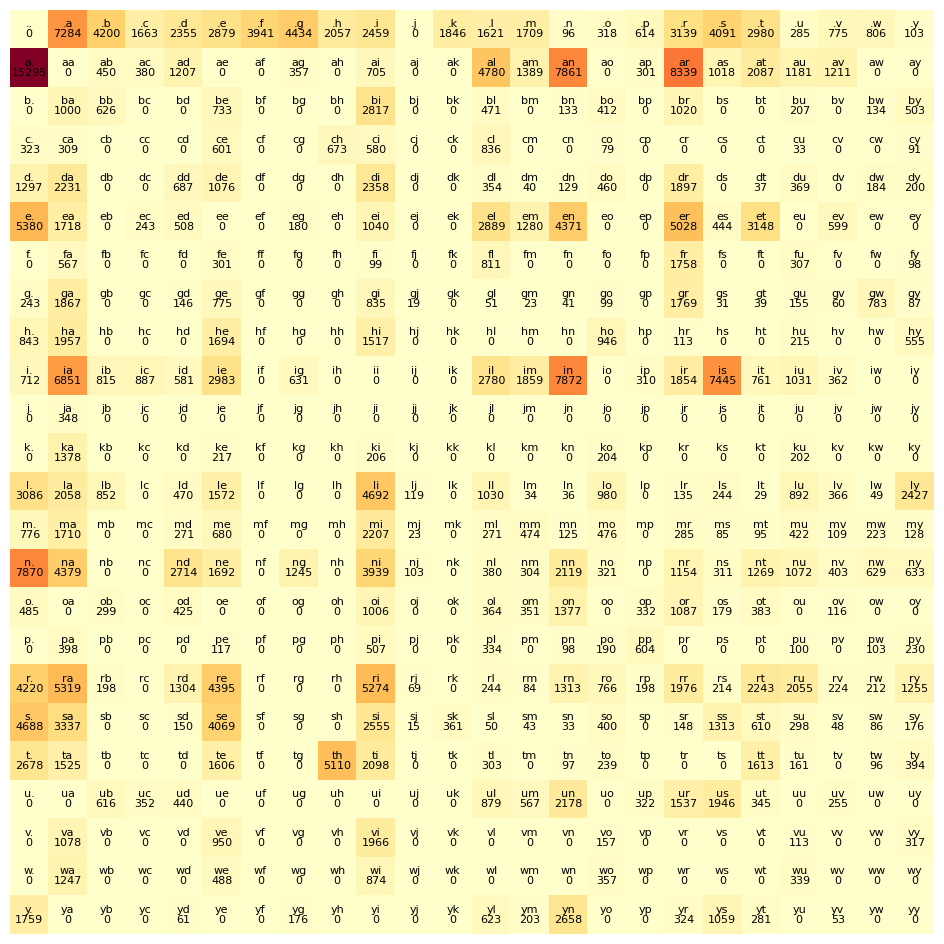

In [15]:
plt.figure(figsize=(12, 12))
plt.imshow(N, cmap="YlOrRd")
for i in range(num_of_symbols):
    for j in range(num_of_symbols):
        bigram = f"{itos[i]}{itos[j]}"
        plt.text(j, i, bigram, ha='center', va='bottom', fontsize=8)
        plt.text(j, i, N[i, j].item(), ha='center', va='top', fontsize=8)

plt.axis('off')

In [18]:
# Probability tensor 
P = N.float()
P /= P.sum(1, keepdim=True) # keeping dimensions to normalize the rows (not the columns)

In [20]:
samples = []
for _ in range(10):
    idx, out = 0, ""
    while True:
        p = P[idx]
        idx = torch.multinomial(p, num_samples=1, replacement=True).item()
        if idx == 0:
            break
        out += itos[idx]

    samples.append(out)

print(samples)

['grinarta', 'dalibyrar', 'dunndart', 'th', 'ten', 'lyn', 'avin', 'inenretiaia', 's', 'fathe']
